# TP IAD — PASO 6: Abrir archivo Personas 3T2024, filtrar aglos 13 y 32

---
**Instrucciones:**
1. Ejecutá las celdas en orden (Shift+Enter).
2. Ajustá el nombre del archivo si difiere.
3. Confirmá que ves 10 filas de cada aglomerado.


In [2]:
# 0) Imports y configuración básica
import os
import pandas as pd

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

In [3]:
# 1) Rutas del proyecto (ajustá 'project_path' si tu carpeta no se llama exactamente 'TP_IAD')
from pathlib import Path
project_path = Path.cwd()
# Si el notebook está dentro de TP_IAD/src, subimos un nivel
if project_path.name == 'src':
    project_path = project_path.parent
raw_path = project_path / 'data' / 'raw'
interim_path = project_path / 'data' / 'interim'
raw_path, interim_path

(WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/data/raw/data/raw'),
 WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/data/raw/data/interim'))

In [4]:
# 2) Listar archivos disponibles en data/raw
files = sorted([p.name for p in raw_path.glob('*') if p.is_file()])
files

[]

In [5]:
# 3) Elegir archivo de Personas 3T2024 (ajustá si tu nombre difiere)
# Ejemplos típicos: 'usu_individual_t324.txt', 'usu_individual_3t2024.txt', 'usu_individual_2024T3.txt', etc.
FILENAME = None
for cand in files:
    if ('individu' in cand.lower() or 'person' in cand.lower()) and ('24' in cand or '2024' in cand) and ('3' in cand or 't3' in cand.lower() or '3t' in cand.lower() or '324' in cand):
        FILENAME = cand
        break
FILENAME

In [6]:
# Si FILENAME quedó en None, poné el nombre exacto acá, por ejemplo:
# FILENAME = 'usu_individual_t324.txt'
FILENAME = 'usu_individual_t324.txt'

In [7]:
# 4) Lectura robusta (acepta nombre simple o ruta completa)
from pathlib import Path

assert FILENAME is not None and len(FILENAME) > 0, "Definí FILENAME con el nombre del archivo."

# Si FILENAME es ruta absoluta/relativa a archivo, úsala. Si no, usar data/raw/FILENAME
cand = Path(FILENAME)
path_file = cand if cand.is_file() else (raw_path / FILENAME)

print("Leyendo:", path_file.resolve())

# Detección simple de formato
suffix = path_file.suffix.lower()
if suffix in [".xlsx", ".xls"]:
    df = pd.read_excel(path_file)
else:
    # TXT/CSV de INDEC suelen venir con ';' y latin-1
    df = pd.read_csv(path_file, sep=';', encoding='latin-1', low_memory=False)

df.shape, df.head(3)


Leyendo: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\data\raw\usu_individual_T324.txt


((47564, 177),
                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  REGION MAS_500  AGLOMERADO  PONDERA  CH03  CH04        CH05  CH06  CH07  CH08  \
 0  TQRMNOPTVHLOKRCDEFJAH00803557  2024          3          1           1    1      43       N           3      234     1     2  10/10/1990    33     1     2   
 1  TQRMNOPTVHLOKRCDEFJAH00803557  2024          3          1           2    1      43       N           3      234     2     1  25/06/1991    33     1     1   
 2  TQRMNOQPRHKLKNCDEFJAH00868631  2024          3          1           1    1      43       N           3      277     1     1  22/04/1943    81     2     1   
 
    CH09  CH10  CH11  CH12  CH13  CH14  CH15  CH15_COD  CH16  CH16_COD  NIVEL_ED  ESTADO  CAT_OCUP  CAT_INAC  IMPUTA  PP02C1  PP02C2  PP02C3  PP02C4  PP02C5  \
 0     1     2     0     7     1   NaN     1       NaN     1       NaN         6       1         3         0     NaN       0       0       0       0       0   
 1     1     2     

In [8]:
# 5) Normalizar nombres de columnas a mayúsculas (por si vienen en minúsculas)
df.columns = [c.upper() for c in df.columns]
df.filter(items=['ANO4','TRIMESTRE','AGLOMERADO']).head(3)

,ANO4,TRIMESTRE,AGLOMERADO
0,2024,3,3
1,2024,3,3
2,2024,3,3


In [9]:
# 6) Convertir tipos básicos
for c in ['ANO4', 'TRIMESTRE', 'AGLOMERADO']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

# Variables demográficas clave (si están presentes)
for c in ['CH04','CH06']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

# Ingreso ocupación principal (si está)
if 'P21' in df.columns:
    df['P21'] = pd.to_numeric(df['P21'], errors='coerce')

(df.dtypes[['ANO4','TRIMESTRE','AGLOMERADO']].astype(str) if set(['ANO4','TRIMESTRE','AGLOMERADO']).issubset(df.columns) else 'Faltan columnas')

ANO4          Int64
TRIMESTRE     Int64
AGLOMERADO    Int64
dtype: object

In [10]:
# 7) Filtrar solo aglomerados 13 (Gran Córdoba) y 32 (CABA)
mask = df['AGLOMERADO'].isin([13, 32])
df_2aglo = df.loc[mask].copy()
df_2aglo.shape

(3449, 177)

In [11]:
# 8) Ver 10 filas de cada aglomerado para chequear
muestra_13 = df_2aglo[df_2aglo['AGLOMERADO'] == 13].head(10)
muestra_32 = df_2aglo[df_2aglo['AGLOMERADO'] == 32].head(10)
print('Gran Córdoba (13):')
display(muestra_13)
print('\nCABA (32):')
display(muestra_32)

Gran Córdoba (13):


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,CH04,CH05,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,IMPUTA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP3E_TOT,PP3F_TOT,PP03G,PP03H,PP03I,PP03J,INTENSI,PP04A,PP04B_COD,PP04B1,PP04B2,PP04B3_MES,PP04B3_ANO,PP04B3_DIA,PP04C,PP04C99,...,PP11C99,PP11D_COD,PP11G_ANO,PP11G_MES,PP11G_DIA,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,P21,DECOCUR,IDECOCUR,RDECOCUR,GDECOCUR,PDECOCUR,ADECOCUR,PONDIIO,TOT_P12,P47T,DECINDR,IDECINDR,RDECINDR,GDECINDR,PDECINDR,ADECINDR,PONDII,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
172,TQRMNOUVPHLLLOCDEGJBF00804887,2024,3,1,1,1,43,S,13,722,1,2,14/09/1994,29,5,1,1,2,0,7,1,NaN,3,54.0,3,54.0,6,1,3,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,40.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,8600.0,2.0,0.0,0.0,0.0,0.0,12.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000,6,6.0,6,6.0,NaN,6,721,0,600000.0,7,7.0,7,7.0,NaN,7,727,0,0,0,0,0,0,0,0,100000,0,0,0,100000,600000,3,4.0,3,3.0,NaN,3,600000,8,8.0,8,8.0,NaN,8,727
173,TQRMNOSPSHLOLPCDEGJBF00804890,2024,3,1,1,1,43,S,13,1242,1,2,04/04/1992,32,1,4,1,2,0,3,1,NaN,1,NaN,1,NaN,3,3,0,4,NaN,0,0,0,0,0,0,0,0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,1242,0,217000.0,2,3.0,2,2.0,NaN,2,1259,0,0,0,217000,0,0,0,0,0,0,0,0,217000,567000,3,3.0,3,3.0,NaN,3,113400,1,1.0,1,1.0,NaN,1,1233
174,TQRMNOSPSHLOLPCDEGJBF00804890,2024,3,1,2,1,43,S,13,1242,2,1,26/09/1992,31,1,4,1,2,0,3,1,NaN,1,NaN,1,NaN,3,1,2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,40.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,4000.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000,4,4.0,4,4.0,NaN,4,1315,0,350000.0,4,5.0,4,4.0,NaN,4,1303,0,0,0,0,0,0,0,0,0,0,0,0,0,567000,3,3.0,3,3.0,NaN,3,113400,1,1.0,1,1.0,NaN,1,1233
175,TQRMNOSPSHLOLPCDEGJBF00804890,2024,3,1,3,1,43,S,13,1242,3,1,04/09/2012,11,5,4,1,1,1,3,2,5.0,1,NaN,1,NaN,1,3,0,3,NaN,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,1242,0,0.0,0,0.0,0,0.0,NaN,0,1242,0,0,0,0,0,0,0,0,0,0,0,0,0,567000,3,3.0,3,3.0,NaN,3,113400,1,1.0,1,1.0,NaN,1,1233
176,TQRMNOSPSHLOLPCDEGJBF00804890,2024,3,1,4,0,43,S,13,1242,3,1,16/01/2017,7,5,4,1,1,1,3,2,1.0,1,NaN,1,NaN,1,4,0,3,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,1242,0,0.0,0,0.0,0,0.0,NaN,0,1242,0,0,0,0,0,0,0,0,0,0,0,0,0,567000,3,3.0,3,3.0,NaN,3,113400,1,1.0,1,1.0,NaN,1,1233
177,TQRMNOSPSHLOLPCDEGJBF00804890,2024,3,1,5,0,43,S,13,1242,3,2,24/06/2020,4,5,4,2,1,1,1,2,0.0,1,NaN,6,NaN,7,4,0,5,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,1242,0,0.0,0,0.0,0,0.0,NaN,0,1242,0,0,0,0,0,0,0,0,0,0,0,0,0,567000,3,3.0,3,3.0,NaN,3,113400,1,1.0,1,1.0,NaN,1,1233
178,TQRMNOQXUHLKLRCDEGJBF00868431,2024,3,1,1,1,43,S,13,1167,1,1,17/09/1985,38,5,1,1,2,0,7,2,2.0,2,NaN,1,NaN,5,1,3,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,40.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,4807.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780000,8,8.0,8,8.0,NaN,8,1278,0,1230000.0,9,10.0,10,9.0,NaN,10,1284,0,0,0,0,0,0,0,0,150000,0,0,0,150000,1230000,7,8.0,7,7.0,NaN,7,1230000,10,10.0,10,10.0,NaN,10,1271
242,TQRMNORTQHJOKMCDEGJBF00863371,2024,3,1,1,1,43,S,13,949,1,1,20/11/1961,62,5,4,1,2,0,2,1,NaN,3,86.0,1,NaN,2,1,2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,10.0,0.0,2.0,0.0,


CABA (32):


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,CH04,CH05,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,IMPUTA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP3E_TOT,PP3F_TOT,PP03G,PP03H,PP03I,PP03J,INTENSI,PP04A,PP04B_COD,PP04B1,PP04B2,PP04B3_MES,PP04B3_ANO,PP04B3_DIA,PP04C,PP04C99,...,PP11C99,PP11D_COD,PP11G_ANO,PP11G_MES,PP11G_DIA,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,P21,DECOCUR,IDECOCUR,RDECOCUR,GDECOCUR,PDECOCUR,ADECOCUR,PONDIIO,TOT_P12,P47T,DECINDR,IDECINDR,RDECINDR,GDECINDR,PDECINDR,ADECINDR,PONDII,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
86,TQRMNOQRPHKNNTCDEIIAD00868801,2024,3,1,1,1,1,S,32,2284,1,2,21/12/1964,59,4,4,1,2,0,6,2,99.0,1,NaN,1,NaN,5,2,2,0,NaN,2,1,2,2,2,1,2,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,42131.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0,0.0,NaN,0,2284,0,650000.0,7,NaN,7,7.0,NaN,4,2957,0,0,0,0,650000,0,0,0,0,0,0,0,650000,650000,4,NaN,3,3.0,NaN,2,325000,5,NaN,5,5.0,NaN,2,2903
87,TQRMNOQRPHKNNTCDEIIAD00868801,2024,3,1,2,1,1,S,32,2284,3,2,22/03/2003,21,5,4,1,2,0,4,1,NaN,1,NaN,1,NaN,4,3,0,4,NaN,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0,NaN,0,2284,0,0.0,0,NaN,0,0.0,NaN,0,2284,0,0,0,0,0,0,0,0,0,0,0,0,0,650000,4,NaN,3,3.0,NaN,2,325000,5,NaN,5,5.0,NaN,2,2903
88,TQRMNOSPUHMMNPCDEIIAD00812121,2024,3,1,1,1,1,S,32,3754,1,2,09/07/1953,71,4,2,1,2,0,8,1,NaN,1,NaN,1,NaN,6,3,0,1,NaN,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0,NaN,0,3754,0,800000.0,8,NaN,7,8.0,NaN,5,4827,800000,0,0,0,0,0,0,0,0,0,0,0,800000,800000,5,NaN,4,5.0,NaN,3,800000,9,NaN,9,9.0,NaN,6,4500
89,TQRMNOUWUHMONQCDEIIAD00868802,2024,3,1,2,1,1,S,32,1861,2,2,23/08/1953,71,1,1,1,2,0,7,1,NaN,1,NaN,1,NaN,6,1,2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,8600.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000,6,NaN,5,5.0,NaN,3,2713,0,2500000.0,10,NaN,10,10.0,NaN,10,2654,2000000,0,0,0,0,0,0,0,0,0,0,0,2000000,6500000,10,NaN,10,10.0,NaN,10,3250000,10,NaN,10,10.0,NaN,10,3624
90,TQRMNOUWUHMONQCDEIIAD00868802,2024,3,1,1,1,1,S,32,1861,1,1,04/10/1954,70,1,1,1,2,0,8,1,NaN,3,82.0,1,NaN,6,3,0,1,NaN,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0,NaN,0,1861,0,4000000.0,10,NaN,10,10.0,NaN,10,2306,4000000,0,0,0,0,0,0,0,0,0,0,0,4000000,6500000,10,NaN,10,10.0,NaN,10,3250000,10,NaN,10,10.0,NaN,10,3624
565,TQRMNOPVQHJNOLCDEIIAD00863003,2024,3,1,1,1,1,S,32,2497,1,1,14/06/2001,23,5,2,1,1,2,7,2,4.0,3,30.0,3,30.0,5,1,2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,12.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,8600.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000,1,NaN,1,1.0,NaN,1,3743,0,1245000.0,9,NaN,9,9.0,NaN,8,3949,0,0,0,0,0,0,0,0,1200000,0,0,0,1200000,1245000,7,NaN,7,7.0,NaN,5,622500,8,NaN,8,8.0,NaN,5,3287
566,TQRMNOPVQHJNOLCDEIIAD00863003,2024,3,1,2,1,1,S,32,2497,8,1,24/06/2005,19,5,2,1,1,2,7,2,1.0,3,30.0,3,30.0,5,3,0,3,NaN,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0,NaN,0,2497,0,0.0,0,NaN,0,0.0,NaN,0,2497,0,0,0,0,0,0,0,0,0,0,0,0,0,1245000,7,NaN,7,7.0,NaN,5,622500,8,NaN,8,8.0,NaN,5,3287
567,TQRMNOSUSHJNOLCDEIIAD00863004,2024,3,1,1,1,1,S,32,1364,1,1,01/01/1900,60,2,1,1,2,0,7,1,NaN,1,NaN,1,NaN,6,1,1,0,NaN,0,0,0

In [12]:
# A1) Asegurar carpeta /interim
interim_path.mkdir(parents=True, exist_ok=True)

# A2) Guardar en CSV comprimido (no requiere librerías extra)
csv_path = interim_path / "personas_2024T3_aglo13_32.csv.gz"
df_2aglo.to_csv(csv_path, index=False, compression="gzip")
csv_path, df_2aglo.shape


(WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/data/raw/data/interim/personas_2024T3_aglo13_32.csv.gz'),
 (3449, 177))

---
**Checklist de control:**
- [ ] `files` muestra tu archivo en `data/raw`.
- [ ] `FILENAME` quedó con el nombre correcto.
- [ ] `df.shape` es razonable (miles de filas).
- [ ] Las columnas `ANO4`, `TRIMESTRE`, `AGLOMERADO` existen.
- [ ] Viste 10 filas de `AGLOMERADO=13` y 10 filas de `AGLOMERADO=32`.
- [ ] Se guardó `personas_2024T3_aglo13_32.parquet` en `data/interim/`.


In [13]:
from pathlib import Path
# ubicamos el archivo por nombre en todo el proyecto
cands = list(project_path.rglob("personas_2024T3_aglo13_32.csv.gz"))
cands


[WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/data/raw/data/interim/personas_2024T3_aglo13_32.csv.gz')]

In [14]:
import pandas as pd
df2 = pd.read_csv(csv_path, compression="gzip", low_memory=False)

# Normalizo nombres a mayúsculas por las dudas
df2.columns = [c.upper() for c in df2.columns]

# Verifico que estén estas columnas mínimas
cols_minimas = ["ANO4","TRIMESTRE","AGLOMERADO","PONDERA","ESTADO","CH04","CH06"]
faltan = [c for c in cols_minimas if c not in df2.columns]
df2.shape, faltan, df2.head(3)


((3449, 177),
 [],
                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  REGION MAS_500  AGLOMERADO  PONDERA  CH03  CH04        CH05  CH06  CH07  CH08  \
 0  TQRMNOQRPHKNNTCDEIIAD00868801  2024          3          1           1    1       1       S          32     2284     1     2  21/12/1964    59     4     4   
 1  TQRMNOQRPHKNNTCDEIIAD00868801  2024          3          1           2    1       1       S          32     2284     3     2  22/03/2003    21     5     4   
 2  TQRMNOSPUHMMNPCDEIIAD00812121  2024          3          1           1    1       1       S          32     3754     1     2  09/07/1953    71     4     2   
 
    CH09  CH10  CH11  CH12  CH13  CH14  CH15  CH15_COD  CH16  CH16_COD  NIVEL_ED  ESTADO  CAT_OCUP  CAT_INAC  IMPUTA  PP02C1  PP02C2  PP02C3  PP02C4  PP02C5  \
 0     1     2     0     6     2  99.0     1       NaN     1       NaN         5       2         2         0     NaN       2       1       2       2       2   
 1     1     2 

In [15]:
# Valores de ESTADO por aglomerado
cont_13 = df2.loc[df2["AGLOMERADO"]==13, "ESTADO"].value_counts(dropna=False).sort_index()
cont_32 = df2.loc[df2["AGLOMERADO"]==32, "ESTADO"].value_counts(dropna=False).sort_index()
cont_13, cont_32


(ESTADO
 1    919
 2     91
 3    706
 4    248
 Name: count, dtype: int64,
 ESTADO
 0      3
 1    846
 2     46
 3    489
 4    101
 Name: count, dtype: int64)

In [16]:
import numpy as np

# Copiamos para no tocar df2
t = df2.copy()

# Garantizar tipos
t['ESTADO'] = pd.to_numeric(t['ESTADO'], errors='coerce')
t['CH06'] = pd.to_numeric(t['CH06'], errors='coerce')  # edad
t['PONDERA'] = pd.to_numeric(t['PONDERA'], errors='coerce')

# Población de 10 años y más
t['POP10P'] = np.where((t['ESTADO'].notna()) & (t['ESTADO'] != 4), 1, 0)

# Variables binarias ponderadas
t['w'] = t['PONDERA']
t['LF']  = np.where(t['ESTADO'].isin([1,2]), 1, 0)       # fuerza laboral (ocupado+desocupado)
t['EMP'] = np.where(t['ESTADO'].eq(1), 1, 0)             # ocupados
t['DES'] = np.where(t['ESTADO'].eq(2), 1, 0)             # desocupados


In [17]:
def tasas_por_aglo(df):
    # Sumas ponderadas por aglo
    g = df.groupby('AGLOMERADO').apply(lambda d: pd.Series({
        'pop10p_w' : (d['POP10P'] * d['w']).sum(),
        'lf_w'     : (d['LF'] * d['w']).sum(),
        'emp_w'    : (d['EMP'] * d['w']).sum(),
        'des_w'    : (d['DES'] * d['w']).sum(),
    })).reset_index()

    # Tasas (en %)
    g['tasa_actividad_%']   = 100 * g['lf_w']  / g['pop10p_w']
    g['tasa_empleo_%']      = 100 * g['emp_w'] / g['pop10p_w']
    g['tasa_desocupacion_%']= 100 * g['des_w'] / g['lf_w']
    # Redondeo lindo
    g[['tasa_actividad_%','tasa_empleo_%','tasa_desocupacion_%']] = \
        g[['tasa_actividad_%','tasa_empleo_%','tasa_desocupacion_%']].round(2)
    return g[['AGLOMERADO','pop10p_w','lf_w','emp_w','des_w',
              'tasa_actividad_%','tasa_empleo_%','tasa_desocupacion_%']]


In [18]:
res_3t2024 = tasas_por_aglo(t[t['AGLOMERADO'].isin([13,32])])
res_3t2024


C:\Users\tomif\AppData\Local\Temp\ipykernel_5116\64195264.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g = df.groupby('AGLOMERADO').apply(lambda d: pd.Series({


,AGLOMERADO,pop10p_w,lf_w,emp_w,des_w,tasa_actividad_%,tasa_empleo_%,tasa_desocupacion_%
0,13,1382157,803371,733076,70295,58.12,53.04,8.75
1,32,2674175,1649587,1576418,73169,61.69,58.95,4.44


In [19]:
# === 10A-bis) Detectar correctamente project_path y raw_path ===
from pathlib import Path

# 1) Partimos desde donde está el notebook
_here = Path.cwd()

# 2) Buscamos hacia arriba una carpeta que tenga /data/raw
candidatos = [_here, _here.parent, _here.parent.parent, _here.parent.parent.parent]
encontrado = None
for p in candidatos:
    if (p / "data" / "raw").exists():
        encontrado = p
        break

# 3) Si no encontró, PEDIMOS poner la ruta manual (CAMBIÁ ESTA LÍNEA si hace falta)
if encontrado is None:
    # EJEMPLO: poné acá tu carpeta TP_IAD exactamente
    encontrado = Path(r"C:\Users\tomif\OneDrive\Escritorio\TP_IAD")

# 4) Seteamos rutas finales y las mostramos
project_path = encontrado
raw_path = project_path / "data" / "raw"
processed_path = project_path / "data" / "processed"
processed_path.mkdir(parents=True, exist_ok=True)

print("project_path =", project_path)
print("raw_path     =", raw_path)
print("Existe raw?  =", raw_path.exists())


project_path = c:\Users\tomif\OneDrive\Escritorio\TP_IAD
raw_path     = c:\Users\tomif\OneDrive\Escritorio\TP_IAD\data\raw
Existe raw?  = True


In [20]:
# === 10A) Setup de rutas y helpers ===
from pathlib import Path
import pandas as pd
import numpy as np

project_path = project_path if 'project_path' in globals() else Path.cwd().parents[0]
raw_path      = project_path / "data" / "raw"
processed_path= project_path / "data" / "processed"
processed_path.mkdir(parents=True, exist_ok=True)

def read_any(path: Path) -> pd.DataFrame:
    """Lee txt/csv/xlsx de EPH (Personas). Devuelve DataFrame."""
    suf = path.suffix.lower()
    if suf in [".xlsx", ".xls"]:
        df = pd.read_excel(path)
    else:
        # INDEC suele usar ';' y latin-1. Probamos robusto.
        try:
            df = pd.read_csv(path, sep=';', encoding='latin-1', low_memory=False)
        except Exception:
            df = pd.read_csv(path, sep=',', encoding='utf-8', low_memory=False)
    # columnas a mayúsculas
    df.columns = [c.upper() for c in df.columns]
    return df

def normalize_types(df: pd.DataFrame) -> pd.DataFrame:
    for c in ["ANO4","TRIMESTRE","AGLOMERADO","ESTADO","CH06","PONDERA"]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def tasas_trimestrales(df: pd.DataFrame) -> pd.DataFrame:
    # Base: 10+ años = excluir ESTADO==4 (menores de 10)
    t = df.copy()
    t["POP10P"] = np.where((t["ESTADO"].notna()) & (t["ESTADO"] != 4), 1, 0)
    t["w"]  = t["PONDERA"]
    t["LF"] = np.where(t["ESTADO"].isin([1,2]), 1, 0)  # 1 Ocup., 2 Desoc.
    t["EMP"]= np.where(t["ESTADO"].eq(1), 1, 0)
    t["DES"]= np.where(t["ESTADO"].eq(2), 1, 0)

    grp = t.groupby(["ANO4","TRIMESTRE","AGLOMERADO"]).apply(lambda d: pd.Series({
        "pop10p_w": (d["POP10P"]*d["w"]).sum(),
        "lf_w":     (d["LF"]*d["w"]).sum(),
        "emp_w":    (d["EMP"]*d["w"]).sum(),
        "des_w":    (d["DES"]*d["w"]).sum(),
    })).reset_index()

    grp["tasa_actividad_%"]    = 100 * grp["lf_w"]  / grp["pop10p_w"]
    grp["tasa_empleo_%"]       = 100 * grp["emp_w"] / grp["pop10p_w"]
    grp["tasa_desocupacion_%"] = 100 * grp["des_w"] / grp["lf_w"]
    grp[["tasa_actividad_%","tasa_empleo_%","tasa_desocupacion_%"]] = \
        grp[["tasa_actividad_%","tasa_empleo_%","tasa_desocupacion_%"]].round(2)
    return grp

def anual_desde_trimestre(tab_tri: pd.DataFrame) -> pd.DataFrame:
    """
    Promedio anual ponderado por población 10+ del trimestre (pop10p_w).
    Más estable que promedio simple si cambia el tamaño poblacional por trimestre.
    """
    def wavg(d, col):
        return (d[col]*d["pop10p_w"]).sum() / d["pop10p_w"].sum()

    out = tab_tri.groupby(["ANO4","AGLOMERADO"]).apply(lambda d: pd.Series({
        "pop10p_w": d["pop10p_w"].sum(),  # suma anual (sólo informativa)
        "tasa_actividad_%":    wavg(d, "tasa_actividad_%"),
        "tasa_empleo_%":       wavg(d, "tasa_empleo_%"),
        "tasa_desocupacion_%": wavg(d, "tasa_desocupacion_%"),
    })).reset_index()

    out[["tasa_actividad_%","tasa_empleo_%","tasa_desocupacion_%"]] = \
        out[["tasa_actividad_%","tasa_empleo_%","tasa_desocupacion_%"]].round(2)
    return out

# === 10B) Leer TODOS los Personas y apilar ===
cands = [p for p in raw_path.iterdir() if p.is_file() and any(s in p.name.lower() for s in ["individu","person","usu_individual","personas"])]
print(f"Encontrados {len(cands)} archivos en data/raw")
frames = []

for p in sorted(cands):
    try:
        df = read_any(p)
        df = normalize_types(df)
        # check mínimos
        if not set(["ANO4","TRIMESTRE","AGLOMERADO","PONDERA","ESTADO"]).issubset(df.columns):
            print(f"Saltado (faltan columnas mínimas): {p.name}")
            continue
        # filtrar 13 y 32
        df = df[df["AGLOMERADO"].isin([13,32])].copy()
        if df.empty:
            print(f"Sin filas para aglo 13/32: {p.name}")
            continue
        frames.append(df[["ANO4","TRIMESTRE","AGLOMERADO","PONDERA","ESTADO","CH06"]].copy())
        print(f"OK: {p.name} -> {df.shape}")
    except Exception as e:
        print(f"Error leyendo {p.name}: {e}")

all_df = pd.concat(frames, ignore_index=True).sort_values(["ANO4","TRIMESTRE","AGLOMERADO"])
all_df.shape


Encontrados 37 archivos en data/raw
OK: EPH_usu_personas_4to.trim_2020.txt.txt -> (2058, 177)
OK: usu_individual_t117.txt -> (4705, 177)
OK: usu_individual_t118.txt -> (4557, 177)
OK: usu_individual_t119.txt -> (4664, 177)
OK: usu_individual_T120.txt -> (3911, 177)
OK: usu_individual_T121.txt -> (2664, 177)
OK: usu_individual_T122.txt.txt -> (3872, 177)
OK: usu_individual_T123.txt -> (4000, 177)
OK: usu_individual_T124.txt -> (3591, 177)
OK: usu_individual_T125.txt -> (3497, 235)
OK: usu_individual_T216.txt -> (4700, 177)
OK: usu_individual_t217.txt -> (4882, 177)
OK: usu_individual_t218.txt -> (4666, 177)
OK: USU_individual_t219.txt -> (4629, 177)
OK: usu_Individual_T220.txt -> (2538, 177)
OK: usu_individual_T221.txt -> (2972, 177)
OK: usu_individual_T222.txt.txt -> (4037, 177)
OK: usu_individual_T223.txt -> (3710, 177)
OK: usu_individual_T224.txt -> (3450, 177)
OK: usu_individual_T225.txt -> (3495, 235)
OK: usu_individual_t316.txt -> (4747, 177)
OK: usu_individual_t317.txt -> (4967, 

(145722, 6)

In [21]:
# === 10C) Tasas trimestrales y anuales (2016–2025) ===
tasas_tri = tasas_trimestrales(all_df)
tasas_tri = tasas_tri.sort_values(["ANO4","TRIMESTRE","AGLOMERADO"]).reset_index(drop=True)
tasas_tri.head(6)


C:\Users\tomif\AppData\Local\Temp\ipykernel_5116\3636326680.py:41: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = t.groupby(["ANO4","TRIMESTRE","AGLOMERADO"]).apply(lambda d: pd.Series({


,ANO4,TRIMESTRE,AGLOMERADO,pop10p_w,lf_w,emp_w,des_w,tasa_actividad_%,tasa_empleo_%,tasa_desocupacion_%
0,2016,2,13,1306424,722254,639534,82720,55.28,48.95,11.45
1,2016,2,32,2620984,1638197,1498345,139852,62.50,57.17,8.54
2,2016,3,13,1306544,721236,650634,70602,55.20,49.80,9.79
3,2016,3,32,2635356,1627699,1498400,129299,61.76,56.86,7.94
4,2016,4,13,1300900,681880,627034,54846,52.42,48.20,8.04
5,2016,4,32,2577813,1597450,1506556,90894,61.97,58.44,5.69


In [26]:
# Verificar tasas para un trimestre específico, por ejemplo 4º trimestre 2020
verif = tasas_tri[(tasas_tri["ANO4"] == 2020) & (tasas_tri["TRIMESTRE"] == 4)]

# Mostramos sólo aglos 13 y 32
verif = verif[verif["AGLOMERADO"].isin([13, 32])]

verif[["ANO4","TRIMESTRE","AGLOMERADO",
        "tasa_actividad_%","tasa_empleo_%","tasa_desocupacion_%"]]

,ANO4,TRIMESTRE,AGLOMERADO,tasa_actividad_%,tasa_empleo_%,tasa_desocupacion_%
36,2020,4,13,54.56,47.47,13.00
37,2020,4,32,57.82,53.66,7.19


In [25]:
# === 10D) Agregado anual ponderado ===
tasas_anual = anual_desde_trimestre(tasas_tri)
tasas_anual = tasas_anual.sort_values(["ANO4","AGLOMERADO"]).reset_index(drop=True)
tasas_anual.head(6)


C:\Users\tomif\AppData\Local\Temp\ipykernel_5116\3636326680.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = tab_tri.groupby(["ANO4","AGLOMERADO"]).apply(lambda d: pd.Series({


,ANO4,AGLOMERADO,pop10p_w,tasa_actividad_%,tasa_empleo_%,tasa_desocupacion_%
0,2016,13,3913868.0,54.30,48.98,9.76
1,2016,32,7834153.0,62.08,57.48,7.40
2,2017,13,5264566.0,53.15,48.71,8.35
3,2017,32,10453964.0,61.29,57.00,7.01
4,2018,13,5313607.0,56.51,50.96,9.84
5,2018,32,10465209.0,60.79,55.96,7.94


In [27]:
# === 10E) Guardar resultados ===
out_tri   = processed_path / "tasas_trimestrales_2016_2025_aglo13_32.csv"
out_anual = processed_path / "tasas_anuales_2016_2025_aglo13_32.csv"
tasas_tri.to_csv(out_tri, index=False)
tasas_anual.to_csv(out_anual, index=False)
out_tri, out_anual


(WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/data/processed/tasas_trimestrales_2016_2025_aglo13_32.csv'),
 WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/data/processed/tasas_anuales_2016_2025_aglo13_32.csv'))

In [28]:
from pathlib import Path
import pandas as pd

project_path = project_path if 'project_path' in globals() else Path.cwd().parents[0]
processed_path = project_path / "data" / "processed"
output_path = project_path / "output"
output_path.mkdir(parents=True, exist_ok=True)

anual_path = processed_path / "tasas_anuales_2016_2025_aglo13_32.csv"
anual = pd.read_csv(anual_path)

cols = ["ANO4","AGLOMERADO","tasa_actividad_%","tasa_empleo_%","tasa_desocupacion_%"]
base = anual[cols].copy()

# Pivot ancho por aglomerado
act_wide = base.pivot(index="ANO4", columns="AGLOMERADO", values="tasa_actividad_%")
emp_wide = base.pivot(index="ANO4", columns="AGLOMERADO", values="tasa_empleo_%")
des_wide = base.pivot(index="ANO4", columns="AGLOMERADO", values="tasa_desocupacion_%")

# Combinar todo en una tabla
tabla = pd.DataFrame({
    "Actividad_13": act_wide.get(13),
    "Actividad_32": act_wide.get(32),
    "Empleo_13": emp_wide.get(13),
    "Empleo_32": emp_wide.get(32),
    "Desocup_13": des_wide.get(13),
    "Desocup_32": des_wide.get(32),
}).reset_index().rename(columns={"ANO4":"Año"})

tabla_path = output_path / "tabla_comparativa_anual_2016_2025_aglo13_32.csv"
tabla.to_csv(tabla_path, index=False)
tabla.head(10), tabla_path


(    Año  Actividad_13  Actividad_32  Empleo_13  Empleo_32  Desocup_13  Desocup_32
 0  2016         54.30         62.08      48.98      57.48        9.76        7.40
 1  2017         53.15         61.29      48.71      57.00        8.35        7.01
 2  2018         56.51         60.79      50.96      55.96        9.84        7.94
 3  2019         55.92         63.01      49.62      58.09       11.25        7.80
 4  2020         54.48         57.78      46.73      52.45       14.29        9.28
 5  2021         57.45         59.12      50.46      54.93       12.18        7.10
 6  2022         56.66         60.80      52.14      57.92        8.00        4.73
 7  2023         58.05         62.03      53.87      59.53        7.22        4.03
 8  2024         58.34         61.32      53.60      58.42        8.13        4.73
 9  2025         57.97         60.70      52.72      57.28        9.06        5.63,
 WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/output/tabla_comparativa_anual

In [29]:
import matplotlib.pyplot as plt

def plot_line(df_wide, title, ylabel, outname):
    plt.figure()
    df_wide.plot(marker="o")
    plt.title(title)
    plt.xlabel("Año")
    plt.ylabel(ylabel)
    plt.grid(True, linestyle="--", linewidth=0.5)
    out = output_path / outname
    plt.savefig(out, bbox_inches="tight", dpi=150)
    plt.close()
    return out

out_act = plot_line(act_wide, "Tasa de actividad (%) — Aglos 13 vs 32", "Actividad (%)", "graf_actividad_anual_13_32.png")
out_emp = plot_line(emp_wide, "Tasa de empleo (%) — Aglos 13 vs 32", "Empleo (%)", "graf_empleo_anual_13_32.png")
out_des = plot_line(des_wide, "Tasa de desocupación (%) — Aglos 13 vs 32", "Desocupación (%)", "graf_desocupacion_anual_13_32.png")

out_act, out_emp, out_des


(WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/output/graf_actividad_anual_13_32.png'),
 WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/output/graf_empleo_anual_13_32.png'),
 WindowsPath('c:/Users/tomif/OneDrive/Escritorio/TP_IAD/output/graf_desocupacion_anual_13_32.png'))

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd

# === IPC base diciembre (índice general) ===
ipc_dic = pd.DataFrame({
    "ANO4": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    "IPC_dic": [100.0, 125.0, 184.5, 284.4, 392.2, 590.1, 1145.9, 3584.8, 7687.3, 9376.5]
})


ipc_dic


,ANO4,IPC_dic
0,2016,100.0
1,2017,125.0
2,2018,184.5
3,2019,284.4
4,2020,392.2
5,2021,590.1
6,2022,1145.9
7,2023,3584.8
8,2024,7687.3
9,2025,9376.5


In [31]:
from pathlib import Path

# 🔧 Fijar manualmente la ruta del proyecto raíz (no la de data/raw)
project_path = Path(r"C:\Users\tomif\OneDrive\Escritorio\TP_IAD")

# Definir correctamente las subcarpetas
raw_path = project_path / "data" / "raw"
processed_path = project_path / "data" / "processed"
processed_path.mkdir(parents=True, exist_ok=True)

print("project_path =", project_path)
print("raw_path =", raw_path)
print("Existe raw? =", raw_path.exists())


project_path = C:\Users\tomif\OneDrive\Escritorio\TP_IAD
raw_path = C:\Users\tomif\OneDrive\Escritorio\TP_IAD\data\raw
Existe raw? = True


In [32]:
from pathlib import Path
import numpy as np
import pandas as pd

# ✅ Fijamos la ruta del proyecto de forma manual (no la volvemos a tocar)
project_path = Path(r"C:\Users\tomif\OneDrive\Escritorio\TP_IAD")
raw_path = project_path / "data" / "raw"
processed_path = project_path / "data" / "processed"
processed_path.mkdir(parents=True, exist_ok=True)

print("✅ Rutas confirmadas:")
print("project_path =", project_path)
print("raw_path =", raw_path)
print("Existe raw? =", raw_path.exists())

# === 2. Leer todos los archivos de Personas nuevamente ===
cands = [p for p in raw_path.iterdir()
         if p.is_file() and any(s in p.name.lower() for s in ["individu","person","usu_individual","personas"])]
frames = []

for p in sorted(cands):
    print("Leyendo:", p.name)
    df = pd.read_csv(p, sep=";", encoding="latin-1", low_memory=False)
    df.columns = [c.upper() for c in df.columns]
    if not set(["ANO4","TRIMESTRE","AGLOMERADO","PONDERA","P21"]).issubset(df.columns):
        print("⚠️ Saltado, faltan columnas mínimas:", p.name)
        continue
    df = df[df["AGLOMERADO"].isin([13,32])].copy()
    df["P21"] = pd.to_numeric(df["P21"], errors="coerce")
    df["PONDERA"] = pd.to_numeric(df["PONDERA"], errors="coerce")
    frames.append(df[["ANO4","AGLOMERADO","P21","PONDERA"]])

all_p21 = pd.concat(frames, ignore_index=True)
print("✅ all_p21.shape =", all_p21.shape)


✅ Rutas confirmadas:
project_path = C:\Users\tomif\OneDrive\Escritorio\TP_IAD
raw_path = C:\Users\tomif\OneDrive\Escritorio\TP_IAD\data\raw
Existe raw? = True
Leyendo: EPH_usu_personas_4to.trim_2020.txt.txt
Leyendo: usu_individual_t117.txt
Leyendo: usu_individual_t118.txt
Leyendo: usu_individual_t119.txt
Leyendo: usu_individual_T120.txt
Leyendo: usu_individual_T121.txt
Leyendo: usu_individual_T122.txt.txt
Leyendo: usu_individual_T123.txt
Leyendo: usu_individual_T124.txt
Leyendo: usu_individual_T125.txt
Leyendo: usu_individual_T216.txt
Leyendo: usu_individual_t217.txt
Leyendo: usu_individual_t218.txt
Leyendo: USU_individual_t219.txt
Leyendo: usu_Individual_T220.txt
Leyendo: usu_individual_T221.txt
Leyendo: usu_individual_T222.txt.txt
Leyendo: usu_individual_T223.txt
Leyendo: usu_individual_T224.txt
Leyendo: usu_individual_T225.txt
Leyendo: usu_individual_t316.txt
Leyendo: usu_individual_t317.txt
Leyendo: usu_individual_T318.txt
Leyendo: Usu_individual_T319.txt
Leyendo: usu_individual_T3

In [33]:
# === IPC base diciembre (índice general) ===
ipc_dic = pd.DataFrame({
    "ANO4": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    "IPC_dic": [100.0, 125.0, 184.5, 284.4, 392.2, 590.1, 1145.9, 3584.8, 7687.3, 9376.5]
})

# Unimos con la tabla IPC
p21 = all_p21.merge(ipc_dic, on="ANO4", how="left")

# Año base: 2025 (último año)
ipc_base = ipc_dic.loc[ipc_dic["ANO4"] == 2025, "IPC_dic"].values[0]

# Calculamos P21_real en pesos constantes de 2025
p21["P21_real"] = p21["P21"] * (ipc_base / p21["IPC_dic"])

# Eliminamos valores extremos
p21 = p21[(p21["P21_real"] > 0) & (p21["P21_real"] < p21["P21_real"].quantile(0.999))]

print("✅ Deflactado. Ejemplo de datos:")
p21.head()


✅ Deflactado. Ejemplo de datos:


,ANO4,AGLOMERADO,P21,PONDERA,IPC_dic,P21_real
1,2020,32,53000.0,3721,392.2,1.267095e+06
2,2020,32,40000.0,3721,392.2,9.562978e+05
6,2020,32,95000.0,2591,392.2,2.271207e+06
8,2020,32,89000.0,2588,392.2,2.127763e+06
11,2020,32,65000.0,1556,392.2,1.553984e+06


In [34]:
# === Resumen anual por aglomerado ===
def resumen_ingresos(df):
    return pd.Series({
        "media": np.average(df["P21_real"], weights=df["PONDERA"]),
        "mediana": df["P21_real"].median(),
        "p25": df["P21_real"].quantile(0.25),
        "p75": df["P21_real"].quantile(0.75),
        "iqr": df["P21_real"].quantile(0.75) - df["P21_real"].quantile(0.25)
    })

tabla_p21 = p21.groupby(["ANO4","AGLOMERADO"]).apply(resumen_ingresos).reset_index()

tabla_p21.to_csv(processed_path / "p21_real_resumen_anual.csv", index=False)
print("✅ Guardado:", processed_path / "p21_real_resumen_anual.csv")
tabla_p21.head(10)


✅ Guardado: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\data\processed\p21_real_resumen_anual.csv


C:\Users\tomif\AppData\Local\Temp\ipykernel_5116\1892590464.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tabla_p21 = p21.groupby(["ANO4","AGLOMERADO"]).apply(resumen_ingresos).reset_index()


,ANO4,AGLOMERADO,media,mediana,p25,p75,iqr
0,2016,13,8.599564e+05,7.032375e+05,375060.000000,1.125180e+06,7.501200e+05
1,2016,32,1.365470e+06,1.125180e+06,750120.000000,1.781535e+06,1.031415e+06
2,2017,13,8.959110e+05,7.501200e+05,405064.800000,1.125180e+06,7.201152e+05
3,2017,32,1.325100e+06,1.125180e+06,718239.900000,1.650264e+06,9.320241e+05
4,2018,13,7.514086e+05,6.098537e+05,345583.739837,1.016423e+06,6.708390e+05
5,2018,32,1.141809e+06,9.656016e+05,609853.658537,1.448402e+06,8.385488e+05
6,2019,13,6.718555e+05,5.604800e+05,316506.329114,8.901741e+05,5.736677e+05
7,2019,32,1.042429e+06,8.242352e+05,494541.139241,1.318776e+06,8.242352e+05
8,2020,13,6.397251e+05,5.438944e+05,286889.342172,8.845755e+05,5.976861e+05
9,2020,32,1.075916e+06,9.323904e+05,549871.239164,1.338817e+06,7.889457e+05


<Figure size 800x500 with 0 Axes>

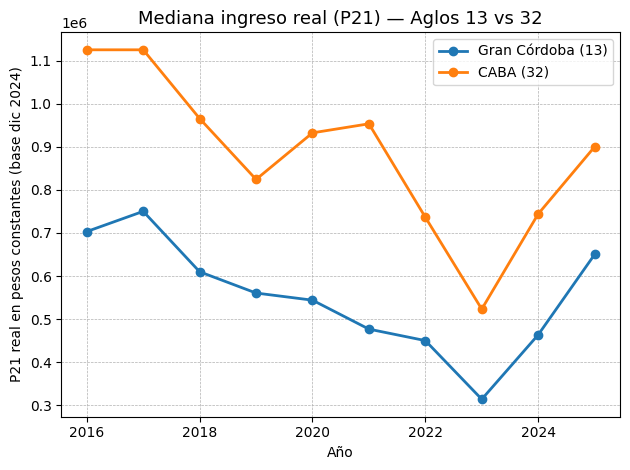

✅ Gráfico guardado en: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\output\graf_mediana_p21_real_13_32.png


In [35]:
import matplotlib.pyplot as plt

# Pivot para dejar años en filas y aglo en columnas
pivot = tabla_p21.pivot(index="ANO4", columns="AGLOMERADO", values="mediana")

plt.figure(figsize=(8,5))
pivot.plot(marker="o", linewidth=2)
plt.title("Mediana ingreso real (P21) — Aglos 13 vs 32", fontsize=13)
plt.ylabel("P21 real en pesos constantes (base dic 2024)")
plt.xlabel("Año")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(["Gran Córdoba (13)", "CABA (32)"])
plt.tight_layout()

# Guardamos la figura
out_path = project_path / "output" / "graf_mediana_p21_real_13_32.png"
plt.savefig(out_path, dpi=150)
plt.show()

print("✅ Gráfico guardado en:", out_path)


In [36]:
all_p21["ANO4"].value_counts().sort_index()


ANO4
2016    14206
2017    19192
2018    18553
2019    18325
2020    10800
2021    12917
2022    15723
2023    14887
2024    14127
2025     6992
Name: count, dtype: int64

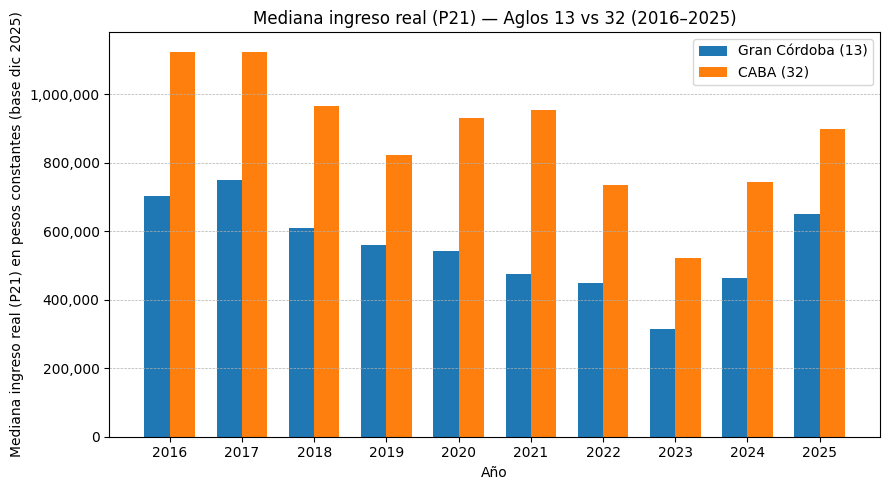

✅ Gráfico de barras guardado en: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\output\graf_mediana_p21_real_barras_13_32.png


In [37]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mticker

# Pivot: filas = años, columnas = aglomerados
pivot = tabla_p21.pivot(index="ANO4", columns="AGLOMERADO", values="mediana")

# Datos para las barras
anos = pivot.index
x = np.arange(len(anos))
width = 0.35

fig, ax = plt.subplots(figsize=(9,5))

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.bar(x - width/2, pivot[13], width, label="Gran Córdoba (13)")
ax.bar(x + width/2, pivot[32], width, label="CABA (32)")

ax.set_xlabel("Año")
ax.set_ylabel("Mediana ingreso real (P21) en pesos constantes (base dic 2025)")
ax.set_title("Mediana ingreso real (P21) — Aglos 13 vs 32 (2016–2025)")
ax.set_xticks(x)
ax.set_xticklabels(anos)
ax.legend()
ax.grid(axis="y", linestyle="--", linewidth=0.5)

plt.tight_layout()
out_path = project_path / "output" / "graf_mediana_p21_real_barras_13_32.png"
plt.savefig(out_path, dpi=150)
plt.show()

print("✅ Gráfico de barras guardado en:", out_path)


In [43]:
# Calcular deciles y desvío estándar por año y aglomerado
deciles = p21.groupby(["ANO4","AGLOMERADO"])["P21_real"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).unstack()
deciles.columns = [f"D{int(i*10)}" for i in deciles.columns]
deciles.reset_index(inplace=True)

desvio = p21.groupby(["ANO4","AGLOMERADO"])["P21_real"].std().reset_index().rename(columns={"P21_real":"desvio_std"})

# Unir con tabla existente
tabla_completa = (tabla_p21
    .merge(deciles, on=["ANO4","AGLOMERADO"], how="left")
    .merge(desvio, on=["ANO4","AGLOMERADO"], how="left"))

tabla_completa.to_csv(processed_path / "p21_real_resumen_anual_completo.csv", index=False)
tabla_completa.head()


,ANO4,AGLOMERADO,media,mediana,p25,p75,iqr,D1,D2,D3,D4,D5,D6,D7,D8,D9,desvio_std
0,2016,13,8.599564e+05,7.032375e+05,375060.000000,1.125180e+06,7.501200e+05,187530.00000,281295.000000,468825.000000,562590.000000,7.032375e+05,8.438850e+05,9.376500e+05,1.312710e+06,1.687770e+06,627440.523637
1,2016,32,1.365470e+06,1.125180e+06,750120.000000,1.781535e+06,1.031415e+06,375060.00000,656355.000000,797002.500000,937650.000000,1.125180e+06,1.406475e+06,1.570564e+06,1.875300e+06,2.344125e+06,841213.067038
2,2017,13,8.959110e+05,7.501200e+05,405064.800000,1.125180e+06,7.201152e+05,225036.00000,337554.000000,450072.000000,600096.000000,7.501200e+05,9.001440e+05,1.125180e+06,1.275204e+06,1.725276e+06,632627.970036
3,2017,32,1.325100e+06,1.125180e+06,718239.900000,1.650264e+06,9.320241e+05,375060.00000,600096.000000,750120.000000,975156.000000,1.125180e+06,1.350216e+06,1.500240e+06,1.875300e+06,2.250360e+06,822836.433719
4,2018,13,7.514086e+05,6.098537e+05,345583.739837,1.016423e+06,6.708390e+05,177873.98374,274434.146341,406569.105691,508211.382114,6.098537e+05,7.623171e+05,9.147805e+05,1.016423e+06,1.524634e+06,541420.990829


=== Regresión Lineal Simple ===
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.29e-10
Time:                        17:35:12   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.285

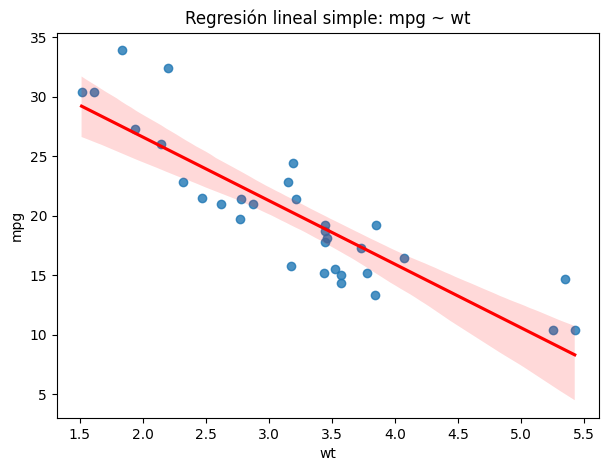


=== Regresión Lineal Múltiple ===
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.79e-07
Time:                        17:35:13   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.

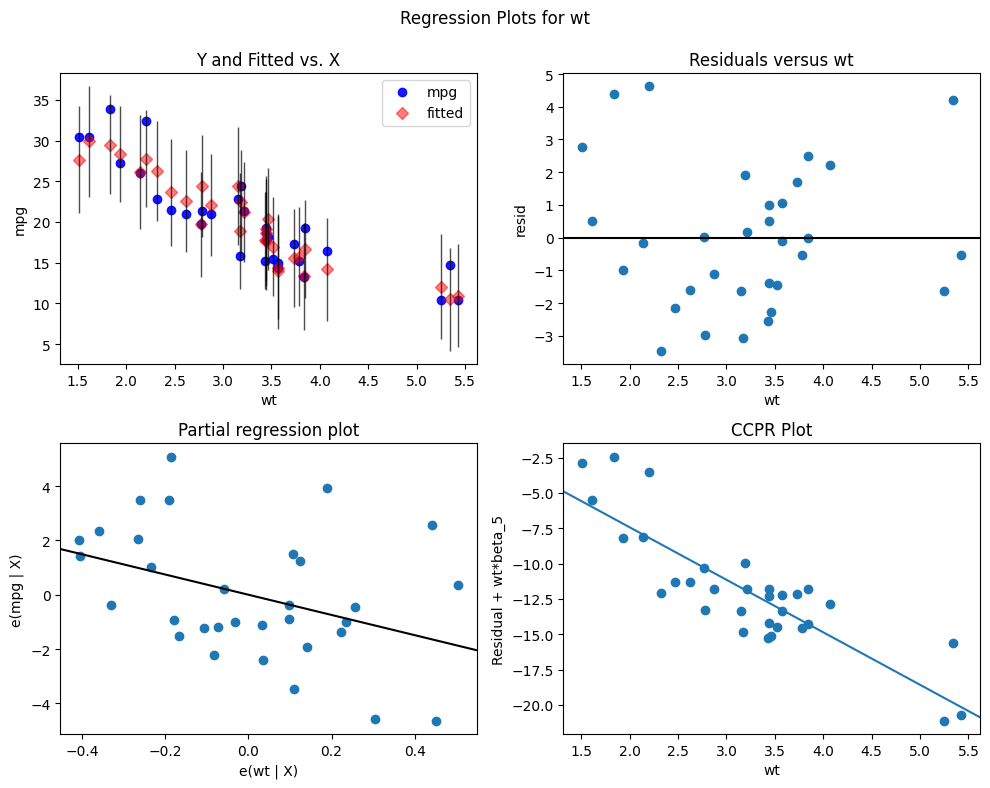

In [42]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mtcars = sm.datasets.get_rdataset("mtcars").data

X_simple = sm.add_constant(mtcars['wt'])  # agregar constante (intercepto)
y = mtcars['mpg']
modelo_simple = sm.OLS(y, X_simple).fit()

print("=== Regresión Lineal Simple ===")
print(modelo_simple.summary())

plt.figure(figsize=(7,5))
sns.regplot(x='wt', y='mpg', data=mtcars, line_kws={'color': 'red'})
plt.title("Regresión lineal simple: mpg ~ wt")
plt.show()

X_multiple = sm.add_constant(mtcars.drop(columns=['mpg']))
modelo_multiple = sm.OLS(y, X_multiple).fit()

print("\n=== Regresión Lineal Múltiple ===")
print(modelo_multiple.summary())

fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(modelo_multiple, 'wt', fig=fig)
plt.show()

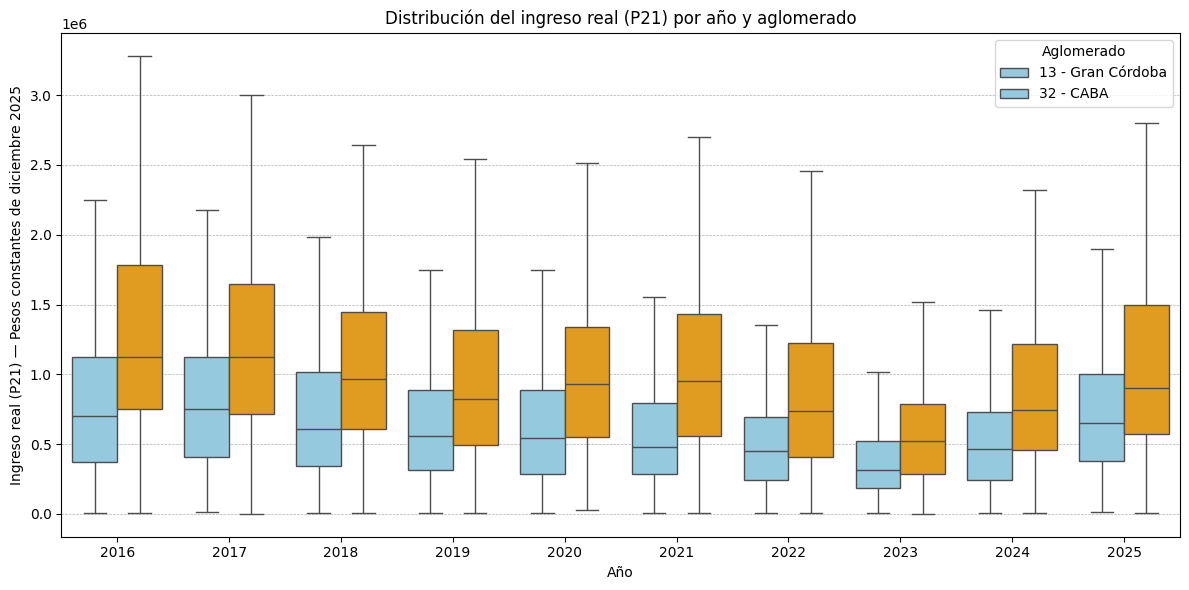

✅ Boxplot guardado en: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\output\graf_boxplot_p21_real_13_32.png


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos tipos correctos
p21["AGLOMERADO"] = p21["AGLOMERADO"].astype(int)
p21["ANO4"] = p21["ANO4"].astype(int)

# Reducimos a los años 2016–2025 (por si hay filas raras)
p21_box = p21[(p21["ANO4"] >= 2016) & (p21["ANO4"] <= 2025)].copy()

# Configuración del gráfico
plt.figure(figsize=(12,6))
sns.boxplot(
    data=p21_box,
    x="ANO4", 
    y="P21_real", 
    hue="AGLOMERADO",
    showfliers=False,          # Oculta los outliers extremos para hacerlo más limpio
    palette={13:"skyblue", 32:"orange"}
)

plt.title("Distribución del ingreso real (P21) por año y aglomerado")
plt.xlabel("Año")
plt.ylabel("Ingreso real (P21) — Pesos constantes de diciembre 2025")
plt.legend(title="Aglomerado", labels=["13 - Gran Córdoba", "32 - CABA"])
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Guardar imagen
out_boxplot = project_path / "output" / "graf_boxplot_p21_real_13_32.png"
plt.savefig(out_boxplot, dpi=150)
plt.show()

print("✅ Boxplot guardado en:", out_boxplot)


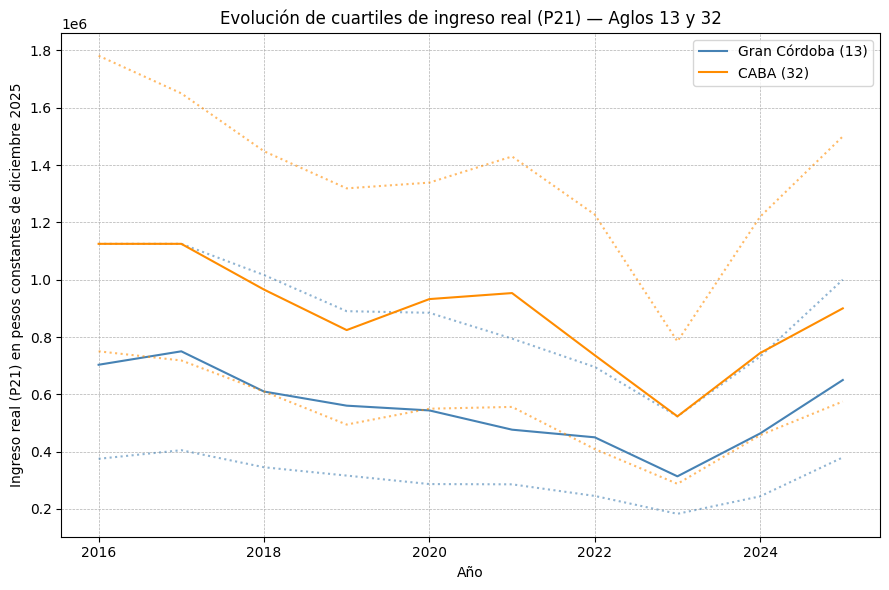

✅ Gráfico guardado en: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\output\graf_cuartiles_p21_real_13_32.png


In [45]:
import matplotlib.pyplot as plt

# Filtramos solo 13 y 32
tabla_plot = tabla_completa[tabla_completa["AGLOMERADO"].isin([13,32])]

# Configurar el gráfico
plt.figure(figsize=(9,6))

for aglo, label, color in [(13, "Gran Córdoba (13)", "steelblue"),
                           (32, "CABA (32)", "darkorange")]:
    df = tabla_plot[tabla_plot["AGLOMERADO"] == aglo]
    plt.plot(df["ANO4"], df["p25"], color=color, linestyle="dotted", alpha=0.6)
    plt.plot(df["ANO4"], df["mediana"], color=color, linestyle="solid", label=label)
    plt.plot(df["ANO4"], df["p75"], color=color, linestyle="dotted", alpha=0.6)

plt.title("Evolución de cuartiles de ingreso real (P21) — Aglos 13 y 32")
plt.xlabel("Año")
plt.ylabel("Ingreso real (P21) en pesos constantes de diciembre 2025")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()

out_cuartiles = project_path / "output" / "graf_cuartiles_p21_real_13_32.png"
plt.savefig(out_cuartiles, dpi=150)
plt.show()

print("✅ Gráfico guardado en:", out_cuartiles)


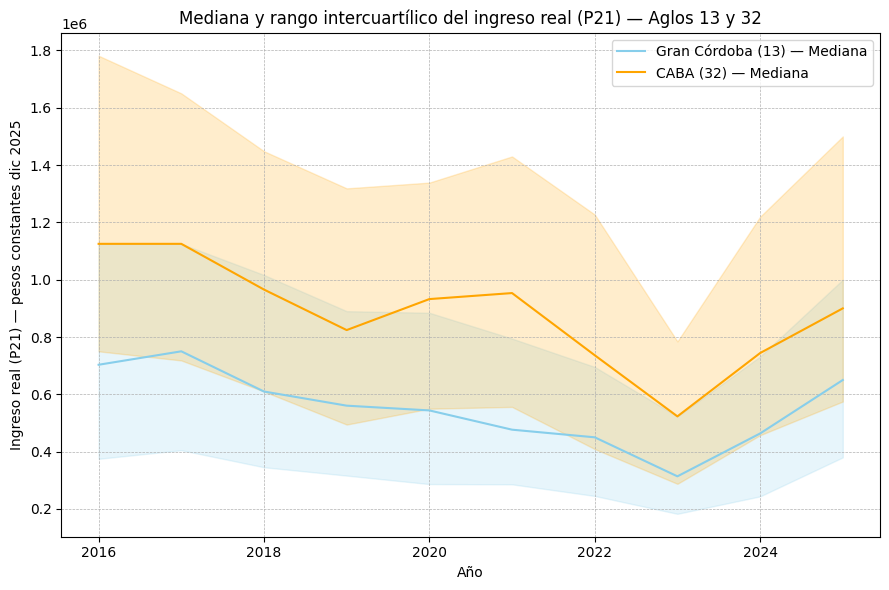

✅ Gráfico con rango intercuartílico guardado en: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\output\graf_rango_intercuartilico_p21_real_13_32.png


In [46]:
import matplotlib.pyplot as plt

# Filtrar solo aglos 13 y 32
tabla_disp = tabla_completa[tabla_completa["AGLOMERADO"].isin([13,32])]

# Configurar gráfico
plt.figure(figsize=(9,6))

for aglo, label, color in [(13, "Gran Córdoba (13)", "skyblue"),
                           (32, "CABA (32)", "orange")]:
    df = tabla_disp[tabla_disp["AGLOMERADO"] == aglo]
    plt.plot(df["ANO4"], df["mediana"], color=color, label=f"{label} — Mediana")
    plt.fill_between(df["ANO4"], df["p25"], df["p75"], color=color, alpha=0.2)

plt.title("Mediana y rango intercuartílico del ingreso real (P21) — Aglos 13 y 32")
plt.xlabel("Año")
plt.ylabel("Ingreso real (P21) — pesos constantes dic 2025")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()

out_iqr = project_path / "output" / "graf_rango_intercuartilico_p21_real_13_32.png"
plt.savefig(out_iqr, dpi=150)
plt.show()

print("✅ Gráfico con rango intercuartílico guardado en:", out_iqr)


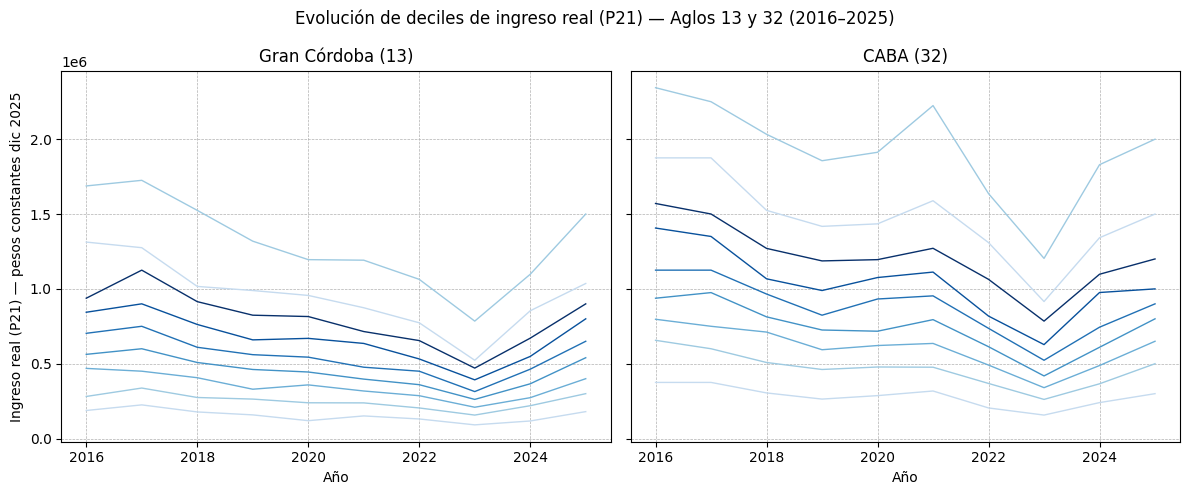

✅ Gráfico separado guardado en: C:\Users\tomif\OneDrive\Escritorio\TP_IAD\output\graf_deciles_p21_real_por_aglo.png


In [48]:
import matplotlib.pyplot as plt

# Filtramos solo los dos aglomerados que analizás
tabla_deciles = tabla_completa[tabla_completa["AGLOMERADO"].isin([13, 32])]
deciles_cols = [f"D{i}" for i in range(1,10)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
colores = ["#c6dbef","#9ecae1","#6baed6","#4292c6","#2171b5","#08519c","#08306b"]

for ax, aglo, color, titulo in zip(
    axes,
    [13, 32],
    ["steelblue", "darkorange"],
    ["Gran Córdoba (13)", "CABA (32)"]
):
    df = tabla_deciles[tabla_deciles["AGLOMERADO"] == aglo]
    for i, d in enumerate(deciles_cols):
        ax.plot(df["ANO4"], df[d], color=colores[i % len(colores)], linewidth=1)
    ax.set_title(titulo)
    ax.set_xlabel("Año")
    ax.grid(True, linestyle="--", linewidth=0.5)
    if aglo == 13:
        ax.set_ylabel("Ingreso real (P21) — pesos constantes dic 2025")

fig.suptitle("Evolución de deciles de ingreso real (P21) — Aglos 13 y 32 (2016–2025)", fontsize=12)
plt.tight_layout()
out_deciles_sep = project_path / "output" / "graf_deciles_p21_real_por_aglo.png"
plt.savefig(out_deciles_sep, dpi=150)
plt.show()

print("✅ Gráfico separado guardado en:", out_deciles_sep)
